<a href="https://colab.research.google.com/github/jonathanhicks97/MLTSA22_JHicks/blob/main/HW6/HW6_JHicks_Revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="red"> FBB this is much better than the previous homework but still your comments are not very deep or even very specific ("it seems it did a good job", "not sure what it means" they are very vague statements that to not demonstrate understanding, they just suggest you _may_ have an understanding. also missing information - e.g. how did you choose the hyperparameters where needed? why did you make the choices you made?</font>

<font color="red"> FBB </font>

In [ ]:
!pip install ruptures
import ruptures as rpt
import pylab as pl
import pandas as pd
%pylab inline




Populating the interactive namespace from numpy and matplotlib


# Synthetic data
the cell below creates a synthetic dataset _(x,y)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(0,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and 25 respectively.

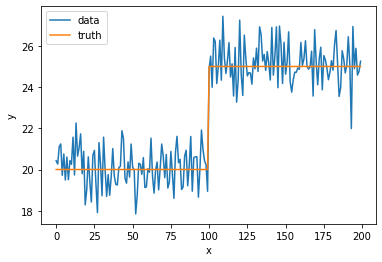

In [ ]:
mu1, mu2 = 20, 25
x = np.arange(200)
ym = np.concatenate([np.random.randn(100) + mu1, np.random.randn(100) + mu2])
pl.plot(x, ym, label="data") 
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, label="truth")
pl.xlabel("x")
pl.ylabel("y")
pl.legend();

**Figure 1:** Generation of random data where from x = [0,100], the mean is 20, and from x=(100,200] the mean is 25. The blue line represents random variation about the mean, and the orange line represents the true mean

<font color="red"> FBB good</font>

# Single POC -  difference of means
write a function that finds the POC by assuming a single POC and maximizing the differencem in the means before and after the POC as described in
https://slides.com/federicabianco/mltsa4#/6/1
test it on the synthetic dataset _(x,y)_

In [ ]:
def maxdiff(y):
    """calculates the POC as the points that maximized the difference between the mean before and the mean after the POC
    y: vector of endogenouos variables
    
    """
    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan
    for i in range(1, N):
        diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
        if diff < diff_here:
            diff = diff_here
            poc = i
            before, after = f(ym[:i]), f(ym[i:])
    return(poc, before, after)  

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*maxdiff(ym)))


poc: 100.00, mean before: 20.09, mean after: 25.18


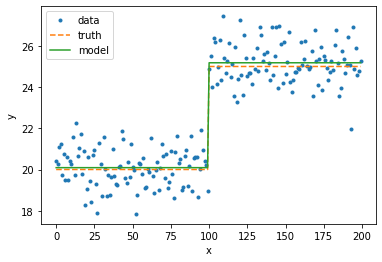

In [ ]:
poc, before, after = maxdiff(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Figure 2:** After generation of the random data(blue) and inclusion of the ground truth that generated the data(orange), an algorithm that detects the point of change and shows it's best guess as to the mean before and after point of change is shown(green)

<font color="red"> FBB good</font>

# Single POC - MSE
write a function that finds the POC by minimizing the square error (see slide https://slides.com/federicabianco/mltsa22_6#/6/2) a single POC and maximizing the differencem in the means before and after the POC. like before return the index of the POC, the mean before and the mean after the POC.
Plot the data, the model, the truth, like in the step above.


Remember to write a docstring for the function https://www.python.org/dev/peps/pep-0257/!

In [ ]:
def mse(inputs):
   """ Given a set of datapoints, calculate the mean and then mean-squared error. return this"""
   mean = np.mean(inputs)
   length = len(inputs)
   error_sq = [0] * length
   for i in range(len(inputs)):
     error_sq[i] = (inputs[i] - mean)**2
   return(sum(error_sq) / len(inputs))

def poc_mse(y):
  """Given a dataset Y, and a point I, calculate mean square error before and after point I. 
     aggregate the mean square errors using weighted average
     (this is essentially just combination of SSE)
     return the value I for which the lowest aggregrated MSE is found, as well
     as the mean of all groups before and after the detected point of change

     y: endogenous variable
     
   """
  N = len(y)
  f = np.nanmean
  poc, diff, before, after = 0, 0, np.nan, np.nan
  mse_max = mse(y)
  for i in range(1, N):
    mse_before = mse(y[:i])
    mse_after = mse(y[i:])
    mse_total = (mse_before * len(y[:i]) + mse_after * len(y[i:])) / N
    if mse_total < mse_max:
      mse_max = mse_total
      poc = i
      before = np.mean(y[:i])
      after = np.mean(y[i:])
  return poc, before, after

In [ ]:

print("poc: {:.2f}, mean before: {:.2f}, mean after: {:.2f}".format(*poc_mse(ym)))


poc: 100.00, mean before: 20.09, mean after: 25.18


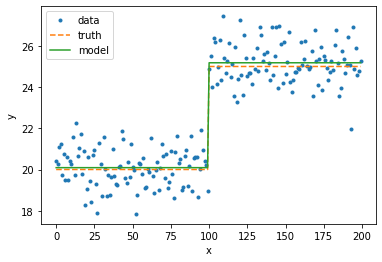

In [ ]:
poc, before, after = poc_mse(ym)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [mu1] * 100 + [mu2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

Figure 3: After generation of the random data(blue) and inclusion of the ground truth that generated the data(orange), an algorithm that detects the point of change based on mean-square error is created and shown(green).

<font color="red"> FBB yup</font>

# Single POC - diff of variance
Generate a new synthetic dataset _(x,ys)_ of 200 points, generated by two processes $ y =c + \epsilon$ with $\epsilon \sim N(\sigma,1)$ (Gaussian stationary processes) that generate 100 points each with means 20 and variance 1 and 4 respectively.

Modify the ```maxdiff()``` function so that it take an optional parameter sigma which allows you to use the function to choose the POC that maximizes the different in standard deviation, instead of in mean. An optional argument is an argument that is set to a default in the function call. The default behavior of the function shoudl still be to calculate the POC as the point that maximized the before and after difference in the _mean_.


In [ ]:
mu1, mu2 = 20, 20
s1, s2 = 1,2 #If variance is 1,4, standard deviation is 1,2
ys = np.concatenate([np.random.randn(100) * s1 + mu1 , np.random.randn(100) * s2 + mu1])

In [ ]:
def maxdiff(y, sigma):
    """calculates the POC as the points that maximized the difference between 
                the mean or variance before and the mean after the POC
    y: vector of endogenouos variables 
    sigma: finds the POC that maximizes the difference between before/after POC variance 
                (optional, default is before/after mean)
                """

    N = len(y)
    f = np.nanmean
    poc, diff, before, after = 0, 0, np.nan, np.nan

    for i in range(1, N):
      if not sigma:
          diff_here = np.abs(f(ym[i:]) -  f(ym[:i]))
          if diff < diff_here:
              diff = diff_here
              poc = i
              before, after = f(ym[:i]), f(ym[i:])
      else:
        var_before = np.var(y[:i])
        var_after = np.var(y[i:])
        diff_in_var = abs(var_before - var_after)
        if diff_in_var > diff:
          diff = diff_in_var
          poc = i
          before, after = np.std(y[:i]),np.std(y[i:])
    return(poc, before, after)  
print("poc: {:.2f}, standard deviation before: {:.2f}, standard deviation after: {:.2f}".format(*maxdiff(ys, sigma=True)))


poc: 100.00, standard deviation before: 1.03, standard deviation after: 2.04


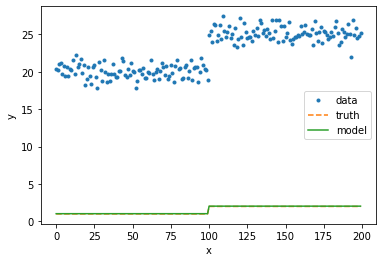

In [ ]:
poc, before, after = maxdiff(ys, sigma=True)   
pl.plot(x, ym, '.', label="data")
pl.plot(range(200), [s1] * 100 + [s2] * 100, '--', label="truth")
pl.plot(x, [before] * poc + [after] * (len(ym) - poc), label="model")
pl.xlabel('x')
pl.ylabel('y');
pl.legend();

**Figure 4: ** Variance-based point-of-change detection. The raw data was generated with s1 = 1, s2 = 2. The generated data is shown in blue, with the ground truth variance shown in yellow. The POC detection model shows the predicted point of change and resultant variances in yellow

<font color="red"> FBB very good</font>

# Find POC with rupture python package.
install and import the rupture package.
Find the POC in each synthetic time series.
Use the Pelt method. Reflect on the parameters that should be passed to the predict() function. Read the manual and feel free to ask questions on slack.

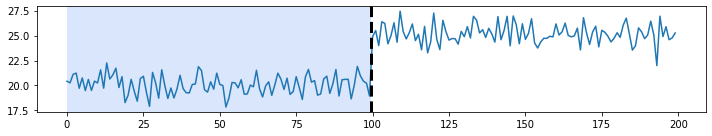

In [ ]:
# detection
algo = rpt.Pelt(model='rbf').fit(ym)
result = algo.predict(pen=5)

# display
rpt.display(ym, [100], result)
pl.show()

Figure 5: Pelt algorithm used to separate by mean. The algorithm separated by day 100

<font color="red"> FBB ok, but there is a bit more here no? for example, you had to choos ethe penalty hyperparameter. How did you do that? what does it do?</font>

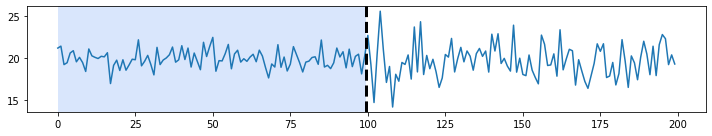

In [ ]:
# detection
algo = rpt.Pelt(model='rbf').fit(ys)
result = algo.predict(pen=5)

# display
rpt.display(ys, [100], result)
pl.show()

Figure 6: Pelt algorithm used to separate variance data. The algorithm correctly separated at daty 100

<font color="red"> FBB same</font>

# read in the data from LANL earthquake prediction 
I saved in the github repo as "http://fbb.space/mltsa/LALNeq.csv. This is a large file and will take a long time to read in. It is 1/100th of the original file. See how nice I am!?! https://www.kaggle.com/c/LANL-Earthquake-Prediction/data

Visualize and use the method DataFrame.describe() to extract some basic statistics of the dataset

In [ ]:
eq1 = pd.read_csv('http://fbb.space/mltsa/LALNeq.csv', index_col = 0)
eq1.describe()

,acoustic_data,time_to_failure
count,4.500000e+06,4.500000e+06
mean,4.616407e+00,8.852012e-01
std,2.614006e+01,3.374432e-01
min,-4.621000e+03,3.008971e-01
25%,2.000000e+00,5.934956e-01
50%,5.000000e+00,8.849986e-01
75%,7.000000e+00,1.177597e+00
max,3.252000e+03,1.469100e+00


In [ ]:
eq1.head()

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


# using rupture

Go through the documentation of rupture. 

Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method (Section 5).

Find a method that takes as input the number of pocs and has computational complexity O(kN^2) and run it for k=1,2,3 pocs on the first N=10,000, 5000, and 1000 rows of the datasets respectively (make a plot for each and discuss each in the caption)




Look at the "cost functions" and "search methos" tab here - https://centre-borelli.github.io/ruptures-docs/user-guide/ and the paper https://arxiv.org/pdf/1801.00718.pdf to find the computational cost associate to each method.





In [ ]:
?rpt.Dynp

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


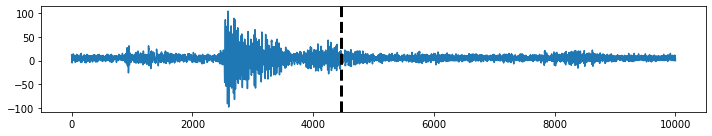

In [ ]:
algo1 = rpt.Dynp(model='normal').fit(eq1[:10000])
result = algo1.predict(n_bkps=1)

# display
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()


Figure 7: Dynamic programming algorithm meant to identify 1 point of change within the 10,000 measurements. a normal cost was assigned in this function

<font color="red"> FBB ok - does it do a reasonable job? I dont think so: I think it is biased to find a point near the center and with the hyperparameter choices you used that is what it did, while there are points along the time series that are far mor clear breaks than what you found to be the break point</font>

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


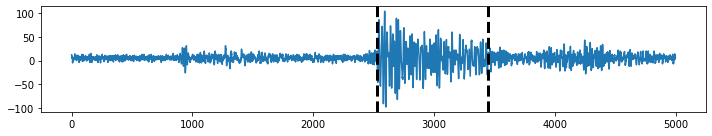

In [ ]:
algo2 = rpt.Dynp(model='normal').fit(eq1[:5000])
result = algo2.predict(n_bkps=2)

# display
rpt.display(eq1.acoustic_data.values[:5000], [], result)
plt.show()

Figure 8: Dynamic programming algorithm meant to identify 2 points of change within the first 5,000 measurements. A normal cost function was implenented, and it appears the earthquake was properly detected.
<font color="red"> FBB ok</font>

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


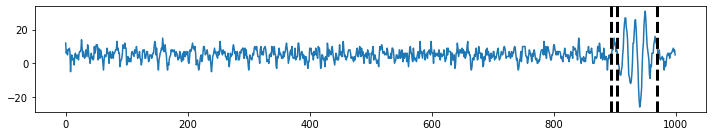

In [ ]:
algo3 = rpt.Dynp(model='normal').fit(eq1[:1000])
result = algo3.predict(n_bkps=3)

# display
rpt.display(eq1.acoustic_data.values[:1000], [], result)
plt.show()

Figure 9: Dynamic programming algorithm meant to identify 3 points of change within the first 1000 datapoints. 3 points of change were found in this implementation, but I am not sure that it means anything

<font color="red"> FBB well, it separated the earthquake properly at both ends, and you are correct to say that there is a separation early in the earthquake signal that seems artificial. But you did not actually say that. I would like to see some more effort in interpreting and explaining what you see. Everyone can run an algorithm. Not everyone is trained well enough to interpret its result. That is what I would like you to demonstrate.</font>

Find a method that has computational complexity O(Nlog(N))

Run both methods on the full 10000 rows dataset with the goal is to isolate 3 chunks of the time series. Read about the methods you choose, and describe the constraints you imposed and the paraemters you choose.

/usr/local/lib/python3.7/dist-packages/ruptures/costs/costnormal.py:32: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  UserWarning,


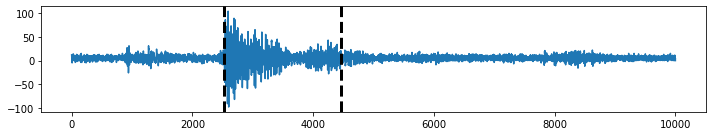

In [ ]:
algo = rpt.Binseg(model='normal').fit(eq1[:10000])
result = algo.predict( pen = 1500)
rpt.display(eq1.acoustic_data.values[:10000], [], result)
plt.show()

Figure 9: Separating of the total dataset using a binary segmentation algorithm. The points of change were calcualted not by providing the minimum number, but allowing the algorithm to run until no split outweighed the penalty of 1500. This number was chosen to create three separate groups of the data. These groups are approximately until point 2500 and until 4500. This represents a different time in the time series and is a region of change.